In [4]:
import tensorflow as tf
tf.__version__

'2.7.0'

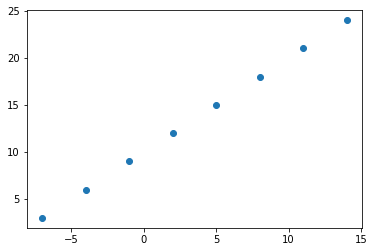

In [5]:
import numpy as np
import matplotlib.pyplot as plt
 
#create features 
x = np.array([-7.0 , -4.0 , -1.0, 2.0 ,5.0, 8.0 , 11.0, 14.0])

#create lable
y= np.array([3.0, 6.0, 9.0, 12.0,15.0, 18.0, 21.0,24.0])

#Version it
plt.scatter(x,y)

In [6]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [7]:
#create a demo tensor for the housing price problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [8]:
input_shape = x.shape 
output_shape = y.shape 
input_shape , output_shape

((8,), (8,))

In [9]:
# Turn the numpy array to tensor 
x = tf.constant(x)
y = tf.constant(y)

x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = x[0].shape 
output_shape = y[0].shape 
input_shape , output_shape

(TensorShape([]), TensorShape([]))

## steps in modelling in tensor flow
1. Creating a model - define the input and the output layers as well as the hidden layers of a deep learning model 
2. Compiling a model - define the loss function (in other words , the function which tells our model how wrong it is)and the optimizer(improve the model) and the evaluation matrix (to get the score and accuracy of the model)
3. Fitting a model - letting the model try to find the patterns between x anf y.

In [11]:
#set random seed 
tf.random.set_seed(42)

# 1. Creating a model using the  Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model 
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(),# sgd is short for stochastic gradient denscent
              metrics=["mae"])
#3. Fitting the model 
model.fit(tf.expand_dims(x, axis=-1), y , epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 508ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
y_preds = model.predict([17.0])
y_preds
#Answer is wrong the ans should be 27 and wasent able to find the pattern

array([[12.716021]], dtype=float32)

#Improving the model

In [13]:
#Lets Re-build the model again
 
#1. Create the model 
model = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
 ])

#2. Compile the model 
model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (this time we've train for the longer)
model.fit(tf.expand_dims(x, axis=-1), y , epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 267ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 5m

In [14]:
# Lets see if the model prediction has improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [15]:
#Improving the model again 
model = tf.keras.Sequential([
            tf.keras.layers.Dense(50 , activation= None),
            tf.keras.layers.Dense(1),
])

model.compile(
    loss= tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics=["mae"]
)

model.fit(tf.expand_dims(x , axis=-1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 0s 384ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - l

In [16]:
model.predict([17.0])


array([[26.58353]], dtype=float32)

#Evaluating the model

* In practice the model -> fit it 
* evaluate the model -> tweak the model,
* fit it -> evaluate the model again 

In [17]:
#visualizing the data
# the model itself 
#the prediction of the model 
#the trainning of the model 


In [18]:
# make a bigger dataset
x = tf.range(-100, 100 , 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
#Make labels for thr dataset
y = x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

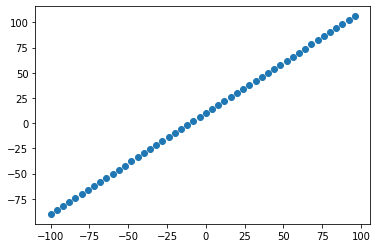

In [20]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(x, y)

In [21]:
### the three set data 
#trainning test data
#validation set 
#test data 


In [22]:
# check the length of the data
len(x)

50

In [23]:
x_train = x[:40]#first 40 are the 80% of the data
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [24]:
tf.random.set_seed(42)

#1. Creting a model 


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

#2.Complie the model 
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])



#Visualizing the model


In [25]:
tf.random.set_seed(42)

#1. Creting a model 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape=[1]),
                             tf.keras.layers.Dense(1, input_shape=[1])
])

#2.Complie the model 
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x_train, y_train, epochs=100 , verbose=1)


Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s 7ms/

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


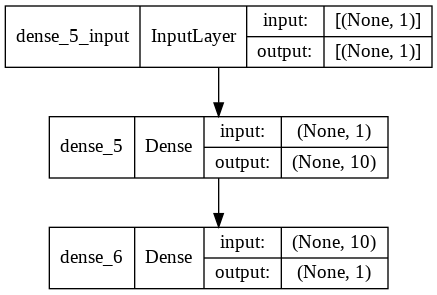

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model=model ,show_shapes=True)

In [30]:
y_preds = model.predict(x_test)
y_preds

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [31]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [32]:
def plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions=y_preds
                     ):
  plt.figure(figsize=(10,7))
  #plot the trainning data in blue
  plt.scatter(train_data , train_labels , c="b", label="trainning data")
  #plot the test data chart
  plt.scatter(test_data, test_labels, c="g", label= "testing data")
  #plot the model prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #plt legend
  plt.legend();

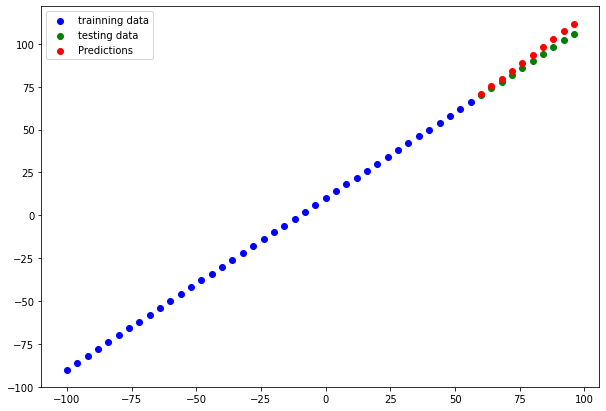

In [33]:
plot_predictions()

#Evaluating the model

In [34]:
#evaluating the model
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 126ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [35]:
#calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [36]:
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [37]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [38]:
#calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [39]:
#same with mean square error 

#3 model of improvement

##Build model_1

In [49]:
# set the random seed
tf.random.set_seed(42)

#creating a model 
model_1 = tf.keras.Sequential([
            tf.keras.layers.Dense(1, input_shape=[1])
])
#2. Compile the model 
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)


In [50]:
#3.fit the model 
model_1.fit(x_train , y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - l

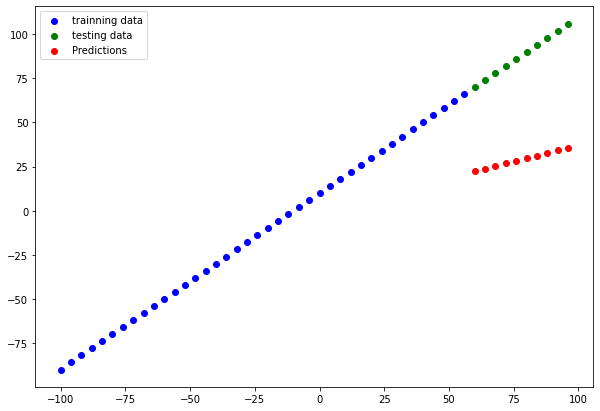

In [55]:
# make and plot the prediction 
y_preds_1 = model_1.predict(x_test)
plot_predictions(predictions=y_preds_1)

##Build model_2

In [56]:
# set the random seed
tf.random.set_seed(42)

#creating a model 
model_2 = tf.keras.Sequential([
            tf.keras.layers.Dense(10, input_shape=[1]),
            tf.keras.layers.Dense(1, input_shape=[1])
])
#2. Compile the model 
model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)
#fit the model
model_2.fit(x_train , y_train , epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s 5ms

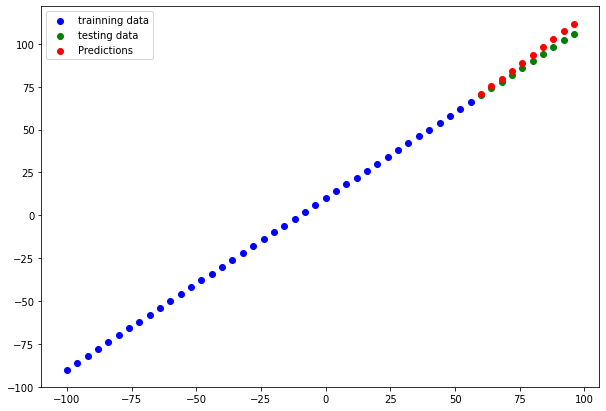

In [57]:
# make and plot the prediction 
y_preds_2 = model_2.predict(x_test)
plot_predictions(predictions=y_preds_2)

In [60]:
#Calculate and evaluate the function
model_2.evaluate(x_test , y_test)

1/1 [==============================] - 0s 153ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

#Model_3 


In [110]:
# set the random seed
tf.random.set_seed(42)

#creating a model 
model_3 = tf.keras.Sequential([
            tf.keras.layers.Dense(26, input_shape=[1]),
            tf.keras.layers.Dense(1, input_shape=[1])
])
#2. Compile the model 
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.1),
    metrics = ["mae"]
)
#fit the model
model_3.fit(x_train , y_train , epochs=75)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/75
2/2 [==============================] - 0s 9ms/step - loss: 23.8714 - mae: 23.8714
Epoch 2/75
2/2 [==============================] - 0s 6ms/step - loss: 20.9746 - mae: 20.9746
Epoch 3/75
2/2 [==============================] - 0s 6ms/step - loss: 24.2471 - mae: 24.2471
Epoch 4/75
2/2 [==============================] - 0s 6ms/step - loss: 23.4158 - mae: 23.4158
Epoch 5/75
2/2 [==============================] - 0s 5ms/step - loss: 7.2898 - mae: 7.2898
Epoch 6/75
2/2 [==============================] - 0s 6ms/step - loss: 14.4745 - mae: 14.4745
Epoch 7/75
2/2 [==============================] - 0s 9ms/step - loss: 8.2785 - mae: 8.2785
Epoch 8/75
2/2 [==============================] - 0s 5ms/step - loss: 11.2797 - mae: 11.2797
Epoch 9/75
2/2 [==============================] - 0s 6ms/step - loss: 5.9720 - mae: 5.9720
Epoch 10/75
2/2 [==============================] - 0s 7ms/step - loss: 12.1354 - mae: 12.1354
Epoch 11/75
2/2 [==============================] - 0s 8ms/step - loss: 8.10

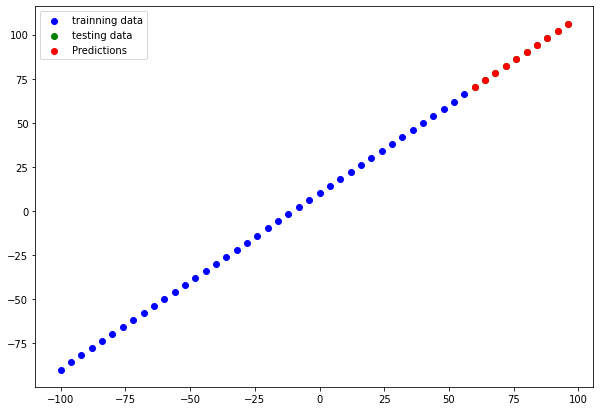

In [111]:
# make and plot the prediction 
y_preds_3 = model_3.predict(x_test)
plot_predictions(predictions=y_preds_3)

In [112]:
y_pred = model_3.predict([300])
y_pred

array([[310.70486]], dtype=float32)

#Save the model in savemodel format and single HDF5 model


In [113]:
# save the using the SaveModel format
model_3.save("best_model_SaveModel_format")

INFO:tensorflow:Assets written to: best_model_SaveModel_format/assets


In [114]:
#save model using the HDF5 format
model_3.save("best_model_SaveModel_format.h5")